Desenvolver um modelo de Aprendizado de Máquina para identificar padrões do equipamento em análise. Desenvolva o Pipeline completo de um projeto de Aprendizado de Máquina, desde a Análise e preparação dos dados adquiridos até a disponibilização do algoritmo no GitHub.

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# np.load() função retorna a matriz de entrada de um arquivo de disco com extensão npy (.npy).
Dados_1 = np.load("Dados_1.npy")
Dados_2 = np.load('Dados_2.npy')
Dados_3 = np.load('Dados_3.npy')
Dados_4 = np.load('Dados_4.npy')
Dados_5 = np.load('Dados_5.npy')
Classes = np.load('Classes.npy', allow_pickle=True)


In [3]:
Classes 


array([['Classe D'],
       ['Classe A'],
       ['Classe A'],
       ...,
       ['Classe D'],
       ['Classe A'],
       ['Classe B']], dtype=object)

In [4]:
# Obtenha a forma de um array com a função np.shape() em Python
print(np.shape(Dados_1))
print(np.shape(Dados_2))
print(np.shape(Dados_3))
print(np.shape(Dados_4))
print(np.shape(Dados_5))
print(np.shape(Classes))

(50000, 201)
(50000, 201)
(50000, 201)
(50000, 200)
(50000, 200)
(50000, 1)


In [5]:
# A função np.size() no pacote NumPy retorna o tamanho de um determinado array
print(np.size(Dados_1))
print(np.size(Dados_2))
print(np.size(Dados_3))
print(np.size(Dados_4))
print(np.size(Dados_5))
print(np.size(Classes))

10050000
10050000
10050000
10000000
10000000
50000


# Neste método, primeiro salvaremos o array em um DataFrame pandas e então converteremos este DataFrame em um arquivo CSV.
#https://www.delftstack.com/pt/howto/numpy/numpy-array-to-csv/
pd.DataFrame(Dados_1).to_csv("Dados_1.csv")
pd.DataFrame(Dados_2).to_csv("Dados_2.csv")
pd.DataFrame(Dados_3).to_csv("Dados_3.csv")
pd.DataFrame(Dados_4).to_csv("Dados_4.csv")
pd.DataFrame(Dados_5).to_csv("Dados_5.csv")
pd.DataFrame(Classes).to_csv("Classes.csv")

In [6]:
# Arrays do NumPy desempenham um papel crítico em algoritmos de machine learning. 
# Modelos de machine learning recebem dados na forma de arrays, e o NumPy fornece várias ferramentas para pré-processar e 
# manipular esses dados.
# https://docs.kanaries.net/pt/topics/NumPy/visualize-numpy-array


In [43]:
#Exclir colunas dos arrays
Dados_11 = Dados_1[:, 0:1]
Dados_22 = Dados_2[:, 0:1]
Dados_33 = Dados_3[:, 0:1]
Dados_44 = Dados_4[:, 0:1]
Dados_55= Dados_5[:, 0:1]

In [64]:
#Convertendo os arrays para um datframe
data1 = pd.DataFrame(Dados_11)
data2 = pd.DataFrame(Dados_22)
data3 = pd.DataFrame(Dados_33)
data4 = pd.DataFrame(Dados_44)
data5 = pd.DataFrame(Dados_55)
data6 = pd.DataFrame(Classes)
#  método concat() para combinar os DataFrames
df = pd.concat([data1, data2, data3, data4, data5, data6], axis=1)


In [65]:
df.columns = ['Dados_1', 'Dados_2','Dados_3','Dados_4','Dados_5','Classes']
df

,Dados_1,Dados_2,Dados_3,Dados_4,Dados_5,Classes
0,-0.032906,-0.032458,-0.182078,50.0,20.881372,Classe D
1,0.198619,-0.044002,-0.065122,50.0,-1.206457,Classe A
2,-0.000792,0.012965,-0.057997,50.0,62.824083,Classe A
3,-0.086419,-0.254154,-0.200595,50.0,-7.094894,Classe B
4,-0.185975,-0.134391,0.519974,50.0,14.008962,Classe D
...,...,...,...,...,...,...
49995,-0.150609,0.081469,0.012576,50.0,54.279703,Classe B
49996,-0.022837,-0.201811,0.177279,50.0,63.216018,Classe E
49997,-0.050631,-0.034103,-0.178266,50.0,65.833098,Classe D
49998,-0.161478,0.198287,0.400348,50.0,47.373926,Classe A


In [66]:
# Verifica a distribuição das classes
df.groupby('Classes').size()

Classes
Classe A    10000
Classe B    10000
Classe C    10000
Classe D    10000
Classe E    10000
dtype: int64

In [67]:
# Convertendo Classes para números 
def checar_Classes(Classes):
    if Classes == 'Classe A':
        return 1
    elif Classes == 'Classe B':
        return 2
    elif Classes == 'Classe C':
        return 3
    elif Classes == 'Classe D':
        return 4
    else:
        return 5
#Aplicando a função checar_TeordeAgua
df['Classes'].apply(checar_Classes)


0        4
1        1
2        1
3        2
4        4
        ..
49995    2
49996    5
49997    4
49998    1
49999    2
Name: Classes, Length: 50000, dtype: int64

In [70]:
# Criando a coluna 
df['Classes']= df['Classes'].apply(checar_Classes)

In [71]:
df

,Dados_1,Dados_2,Dados_3,Dados_4,Dados_5,Classes
0,-0.032906,-0.032458,-0.182078,50.0,20.881372,4
1,0.198619,-0.044002,-0.065122,50.0,-1.206457,1
2,-0.000792,0.012965,-0.057997,50.0,62.824083,1
3,-0.086419,-0.254154,-0.200595,50.0,-7.094894,2
4,-0.185975,-0.134391,0.519974,50.0,14.008962,4
...,...,...,...,...,...,...
49995,-0.150609,0.081469,0.012576,50.0,54.279703,2
49996,-0.022837,-0.201811,0.177279,50.0,63.216018,5
49997,-0.050631,-0.034103,-0.178266,50.0,65.833098,4
49998,-0.161478,0.198287,0.400348,50.0,47.373926,1


In [72]:
df.groupby('Classes').size()

Classes
1    10000
2    10000
3    10000
4    10000
5    10000
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dados_1  50000 non-null  float64
 1   Dados_2  50000 non-null  float64
 2   Dados_3  50000 non-null  float64
 3   Dados_4  49949 non-null  float64
 4   Dados_5  48760 non-null  float64
 5   Classes  50000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 2.3 MB


In [74]:
# Visualização de Dados
df.describe()

,Dados_1,Dados_2,Dados_3,Dados_4,Dados_5,Classes
count,50000.000000,50000.000000,50000.000000,49949.0,48760.000000,50000.000000
mean,0.007289,0.007429,0.007364,50.0,48.171903,3.000000
std,0.085314,0.184788,0.234831,0.0,33.727605,1.414228
min,-0.378568,-0.836852,-1.160500,50.0,-19.449902,1.000000
25%,-0.049378,-0.110485,-0.143990,50.0,22.309652,2.000000
50%,0.006772,0.005182,0.005297,50.0,43.690278,3.000000
75%,0.063485,0.125006,0.158464,50.0,71.905092,4.000000
max,0.394856,0.844976,1.245040,50.0,139.510530,5.000000


 Dempenho de Técnicas de AM é Afetado pela Qualidade dos Dados
# Pré-processamento
Grupo de tarefas de pré-processamento:
- Eliminação manual de atributos
- Integração de dados
- Amostragem de dados
- Redução de dimensionalidade
- Balanceamento de dados
- Limpeza de dados
- Transformação de dados

Observação: não existe ordem fixa para aplicação das diferentes técnicas de pré-processamento

Inteligência Artificial - Uma Abordagem de Aprendizado de Máquina,  2nd Edition.

# Verificação de valores duplicados

In [75]:
if __name__ == '__main__':
    df_duplicates = df[df.duplicated(subset=['Dados_1','Dados_2','Dados_3','Dados_4','Dados_5'],keep=False)] 

    # se tiver valores redundantes ou inconsistentes, imprima 
    if len(df_duplicates)>0:
        print('\nAmostras redundantes ou inconsistentes:')
        display(df_duplicates)
    else:
        print('Não existem valores duplicados')

Não existem valores duplicados


# Implementando modelos sem transformação de dados e desbalanceado

In [79]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [80]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, [0,1,2,3,4]].values
y = df.iloc[:, 5].values



In [81]:
np.random.seed(7) # definindo uma seed global 

# particionando em conjuntos de treino e teste mantendo a proporção de classes
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## APLICAÇÃO DO ALGORITMO LR

In [82]:
# Criando modelo e treinando com os dados de treino
clr = LogisticRegression()
clr.fit(X_train, Y_train)
# Fazendo a predição nos dados de treino
resultado_clr = clr.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

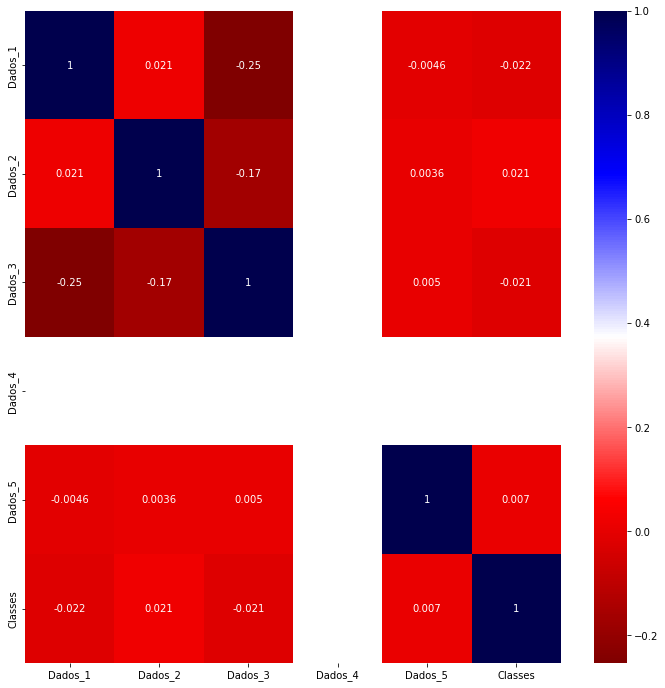

In [76]:
# Matriz de orrelação
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=df.corr(), cmap='seismic_r')
plt.show()